In [224]:
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 1) Transformation of variables

In order to make the transformation from the rectangular pdf $f(x) = 1$ to $g(u)$, we must use the following formula:

$\begin{align}
    g(u) &= f(x(u)) \ |\frac{dx}{du}|
\end{align}$

Using our expression $u = e^{-x}$, we can get $x$ in terms of $u$: $x = -\ln(u)$. Then $\frac{dx}{du} = -\frac{1}{u}$, so

$\begin{align}
    g(u) &= f(x(u)) \ |\frac{dx}{du}| \\
    &= 1 \cdot |-\frac{1}{u}| \\
    &= \frac{1}{u}
\end{align}$

Now, let us plot 3 separate figures for $u(x), \ f(x),$ and $g(u)$:

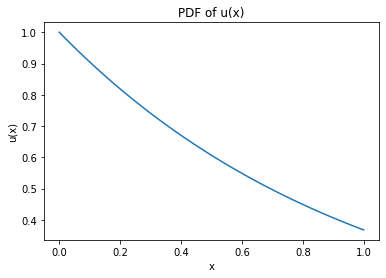

In [239]:
# Plot of u(x)
x = np.linspace(0,1,100)
u = np.exp(-x)
fig1 = plt.plot(x,u)
plt.title("PDF of u(x)")
plt.xlabel("x");
plt.ylabel("u(x)");

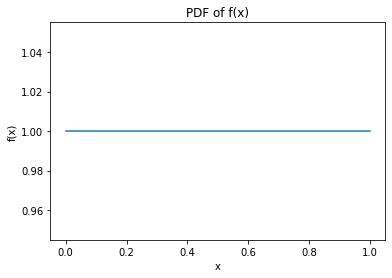

In [240]:
# Plot of f(x)
x = np.linspace(0,1,100)
f = np.ones(100)
fig2 = plt.plot(x,f)
plt.title("PDF of f(x)")
plt.xlabel("x");
plt.ylabel("f(x)");

<ipython-input-241-e6a1fe7f9d96>:3: RuntimeWarning: divide by zero encountered in true_divide
  g = 1/u


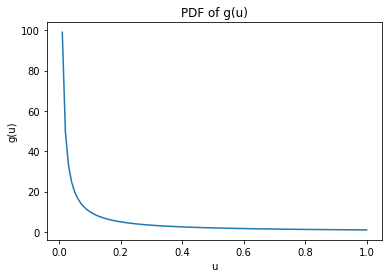

In [241]:
# Plot of g(u)
u = np.linspace(0,1,100)
g = 1/u
fig3 = plt.plot(x,g)
plt.title("PDF of g(u)")
plt.xlabel("u");
plt.ylabel("g(u)");

# 2) Rolling two 6-sided dice

a) We need to roll 1s twice in a row. The probability of rolling a 1 is just $\frac{1}{6}$, and since they are independent events, we can just multiply the two probabilities to get our answer, $(\frac{1}{6})^2$.

b) There are $6 \cdot 6 = 36$ total possible outcomes. In order to get a sum of 5, there are 4 outcomes with equal probability: $1+4, \ 2+3, \ 3+2, \ $ and $\ 4+1$. Thus, there is a $\frac{4}{36} = \frac{1}{9}$ probability of this sum being achieved.

c) We roll a pair of dice 5 times. Each time we roll a pair, the probability of getting snake eyes is $(\frac{1}{6})^2 = 1/36$. Instead of finding the probability that we get at least one pair of snake eyes, we can take the complement and find the probability of getting no snake eyes. The probability of getting no snake eyes five times in a row is given by $(1 - \frac{1}{36})^5 \approx 0.869$. Taking the complement, we find that the probability that we get at least one pair of snake eyes is $1 - 0.869 \approx 0.131$.

In [228]:
# Part a)
p_snakes = (1/6)**2
print("Probability of rolling snake eyes: ", p_snakes)

# Part b)
p_sum_5 = 4*(1/6)**2
print("Probability of rolling a sum of 5 after two rolls: ", p_sum_5)

# Part c)
p_GEQ_one_snake = 1 - (1 - 1/36)**5
print("Probability of at least one pair of snake eyes: ", p_GEQ_one_snake)

Probability of rolling snake eyes:  0.027777777777777776
Probability of rolling a sum of 5 after two rolls:  0.1111111111111111
Probability of at least one pair of snake eyes:  0.13138421387851618


Since $0.131 > 0.111$, the probability of getting at least one pair of snake eyes after five rolls of a pair of dice is larger than the probability of rolling a sum of 5 in one roll of a pair of dice.

# 3) Compare probability distribution functions

In each section below, we compute a binomial, poisson, and normal distribution using increasingly large statistics. As the sample size $N$ becomes larger, we expect to see the distributions become closer together. This is indeed the case as can be seen below in the plots below, with each of the three distribution types looking approximately the same by the time we arrive at $N = 1000$. A table of statistics (mean, variance, skewness, and kurtosis) is provided for each set of three plots. As the sample size is increased, these statistics also begin to reflect each other more closely as the distributions converge.

### Part a)

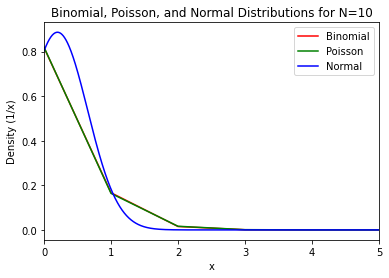

In [229]:
# Part i)
k = np.arange(0,11,1)
x = np.arange(0,11,0.001)

# Binomial distribution w/ N=10, p=0.02
binom_a = binom.pmf(k, 10, 0.02)
# Poisson distribution w/ lambda=0.2
poisson_a = poisson.pmf(k, 0.2)
# Normal distribution w/ mu=0.2, sigma=0.45
normal_a = norm.pdf(x, 0.2, 0.45)


fig4 = plt.plot(k, binom_a, color="r", label="Binomial")
plt.plot(k, poisson_a, color="g", label="Poisson")
plt.plot(x, normal_a, color="b", label="Normal")
plt.title("Binomial, Poisson, and Normal Distributions for N=10")
plt.xlabel("x")
plt.ylabel("Density (1/x)")
plt.legend()
plt.xlim([0,5]);

In [230]:
# Part ii)
bin_stats_a = binom.stats(10, 0.02, moments='mvsk')
psn_stats_a = poisson.stats(0.2, moments='mvsk')
norm_stats_a = norm.stats(0.2, 0.45, moments='mvsk')

df_a = pd.DataFrame([bin_stats_a, psn_stats_a, norm_stats_a], index=["Binomial", "Poisson", "Normal"], columns=["mean", "sigma", "skewness", "kurtosis"])
df_a["sigma"] = df_a["sigma"]**(1/2)
df_a

,mean,sigma,skewness,kurtosis
Binomial,0.2,0.442719,2.168418966972603,4.50204081632653
Poisson,0.2,0.447214,2.23606797749979,5.0
Normal,0.2,0.45,0.0,0.0


### Part b)

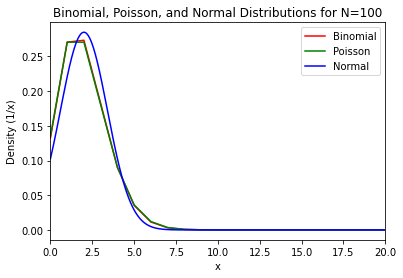

In [231]:
# Part i)
k = np.arange(0,101,1)
x = np.arange(0,101,0.01)

# Binomial distribution w/ N=100, p=0.02
binom_b = binom.pmf(k, 100, 0.02)
# Poisson distribution w/ lambda=2.0
poisson_b = poisson.pmf(k, 2)
# Normal distribution w/ mu=2.0, sigma=1.4
normal_b = norm.pdf(x, 2, 1.4)


fig5 = plt.plot(k, binom_b, color="r", label="Binomial")
plt.plot(k, poisson_b, color="g", label="Poisson")
plt.plot(x, normal_b, color="b", label="Normal")
plt.title("Binomial, Poisson, and Normal Distributions for N=100")
plt.xlabel("x")
plt.ylabel("Density (1/x)")
plt.legend()
plt.xlim([0,20]);

In [232]:
# Part ii)
bin_stats_b = binom.stats(100, 0.02, moments='mvsk')
psn_stats_b = poisson.stats(2, moments='mvsk')
norm_stats_b = norm.stats(2, 1.4, moments='mvsk')

df_b = pd.DataFrame([bin_stats_b, psn_stats_b, norm_stats_b], index=["Binomial", "Poisson", "Normal"], columns=["mean", "sigma", "skewness", "kurtosis"])
df_b["sigma"] = df_b["sigma"]**(1/2)
df_b

,mean,sigma,skewness,kurtosis
Binomial,2.0,1.4,0.6857142857142857,0.4502040816326531
Poisson,2.0,1.414214,0.7071067811865476,0.5
Normal,2.0,1.4,0.0,0.0


### Part c)

c:\Anaconda\lib\site-packages\scipy\stats\_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


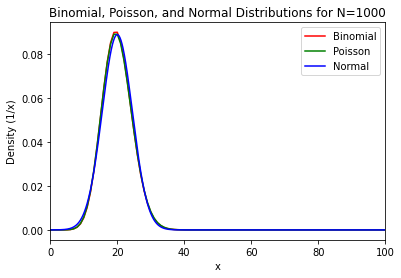

In [242]:
# Part i)
# NOTE: DIVIDE BY 0 ERROR THAT SHOWS UP BELOW IS A KNOWN ISSUE WITH SCIPY.STATS.BINOM AND DOES NOT AFFECT RESULTS.
k = np.arange(0,1001,1)
x = np.arange(0,1001,0.1)

# Binomial distribution w/ N=1000, p=0.02
binom_c = binom.pmf(k, 1000, 0.02)
# Poisson distribution w/ lambda=20
poisson_c = poisson.pmf(k, 20)
# Normal distribution w/ mu=20, sigma=4.5
normal_c = norm.pdf(x, 20, 4.5)


fig6 = plt.plot(k, binom_c, color="r", label="Binomial")
plt.plot(k, poisson_c, color="g", label="Poisson")
plt.plot(x, normal_c, color="b", label="Normal")
plt.title("Binomial, Poisson, and Normal Distributions for N=1000")
plt.xlabel("x")
plt.ylabel("Density (1/x)")
plt.legend()
plt.xlim([0,100]);

In [234]:
# Part ii)
bin_stats_c = binom.stats(1000, 0.02, moments='mvsk')
psn_stats_c = poisson.stats(20, moments='mvsk')
norm_stats_c = norm.stats(20, 4.5, moments='mvsk')

df_c = pd.DataFrame([bin_stats_c, psn_stats_c, norm_stats_c], index=["Binomial", "Poisson", "Normal"], columns=["mean", "sigma", "skewness", "kurtosis"])
df_c["sigma"] = df_c["sigma"]**(1/2)
df_c

,mean,sigma,skewness,kurtosis
Binomial,20.0,4.427189,0.21684189669726028,0.0450204081632653
Poisson,20.0,4.472136,0.22360679774997896,0.05
Normal,20.0,4.5,0.0,0.0
